<a href="https://colab.research.google.com/github/KozinIlya/Test-Study/blob/main/Test_Kozin_Ilya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Комментарии к работе:


 Для "быстрого" учета статистической значимости обрезал выбросы снизу. Апппаратные методы (метод 3-х сигм, отбрасывание n-го процентиля) хорошего результата не дали, поэтому нижний порог для количества просмотров подобрал исходя из "экспертной оценки".
Более хорошим был бы вариант сглаживания среднего значения revenue для пользователей с маленьким количеством просмотров по формуле: 
Сглаженный_mean = сумма_revenue+a*global_mean/count_revenue +а
Где: а - коэффициент сглаживания.
*'апдейт: сглаживания заметного эффекта тоже не дало. Останавился на сглаживание+фильтрация нижних значений'*

 Из интересных особенностей стоит отметить, что хотя основной доход, приносят большие города, их нет в топе по eCPM. В целом распределение и дохода и eCPM показывает что подавляющее количество городов имеет минимальные значения манетизации.

 Большое количество пользователей просматривало рекламу всего 1 раз.

 Свежие OS выглядят намного бодрее как по eCPM, так и по сумме доходов. Возможно проблемы в работе приложения на старых OS.



#Подготовка данных

In [1]:
! gdown --id '1p85_X6bIyREdlSoa8uxNadWtyEkxbhez'

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1p85_X6bIyREdlSoa8uxNadWtyEkxbhez
To: /content/us events ad_revenue filtered 03.02-07.02.csv
100% 571M/571M [00:03<00:00, 160MB/s]


In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/us events ad_revenue filtered 03.02-07.02.csv')
df.head(1)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk


In [ ]:
#Удаляем ненужные данные
df1 = df.drop(columns=['device_manufacturer', 'device_model','device_type','device_locale',
                       'event_name','connection_type','operator_name','country_iso_code',
                       'event_timestamp','event_receive_datetime','event_receive_timestamp'])
df1 = df1.dropna(subset=['profile_id'])                           #удаляем строки без ID
df1['event_datetime'] = pd.to_datetime(df1['event_datetime'])     # меняем формат на datetime



In [4]:
#функция для распарсивания  event_json
def par(s):
  d = json.loads(s)
  return pd.Series([d['revenue'],d['ad_type']])

In [5]:
from tqdm import tqdm
t =df1['event_json'].apply(par)


In [ ]:
t.columns = ['revenue','ad_type']
df_with_revenue = pd.concat([df1, t], axis=1)
df_with_revenue.info()

#Расчет eCPM

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




         Топ10 profile_id по eCPM_mean


,profile_id,sum,count,mean,arrange_reveue,eCPM_mean
2350,JLtY7hvRXO3,5.346986,178,0.030039,0.029803,29.803053
2617,JLw6kvDTnNC,5.706283,198,0.028820,0.028625,28.625125
1557,JLprjBZ6Pvw,6.304135,221,0.028525,0.028355,28.354922
87,JL4mQvmSFki,2.613775,102,0.025625,0.025344,25.344207
2013,JLs8H01mzVe,5.994394,258,0.023234,0.023149,23.148511
850,JLk1Nh53w2K,18.122099,791,0.022910,0.022883,22.883459
1142,JLmCjo3VXsB,9.269546,418,0.022176,0.022130,22.130435
637,JLeN7HL5LuM,3.805546,185,0.020571,0.020494,20.494216
3954,JMFMWEMmTHS,2.115250,103,0.020536,0.020402,20.402049
3728,JMDwbjQO50b,9.357763,467,0.020038,0.020011,20.010916




         Топ10 city по eCPM_mean


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,city,sum,count,mean,arrange_reveue,eCPM_mean
42,Bangor,9.539163,1360,0.007014,0.007021,7.021293
615,Oklahoma City,17.909192,2944,0.006083,0.006088,6.087564
539,Milwaukee,6.989203,1213,0.005762,0.005773,5.773077
151,Cincinnati,15.998012,2833,0.005647,0.005652,5.651929
873,Washington,6.117169,1109,0.005516,0.005529,5.528802
709,Richardson,6.025258,1113,0.005414,0.005427,5.426629
456,Lee's Summit,14.337768,2787,0.005145,0.005150,5.150046
388,Indianapolis,36.679515,7126,0.005147,0.005149,5.149442
161,Cleveland,32.475495,6447,0.005037,0.005040,5.039745
320,Grand Junction,5.715145,1158,0.004935,0.004949,4.949185




         Топ10 os_version по eCPM_mean


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,os_version,sum,count,mean,arrange_reveue,eCPM_mean
2,12,1305.578948,407587,0.003203,0.003203,3.203180
1,11,587.155401,209057,0.002809,0.002809,2.808575
5,7.0,10.950994,4057,0.002699,0.002699,2.698568
0,10,328.267931,150871,0.002176,0.002176,2.175810
10,9,133.105867,66662,0.001997,0.001997,1.996716
8,8.0.0,11.892016,8016,0.001484,0.001484,1.483628
6,7.1.1,1.624575,1342,0.001211,0.001212,1.211724
9,8.1.0,9.787017,9249,0.001058,0.001058,1.058389
7,7.1.2,1.089698,1811,0.000602,0.000604,0.603579


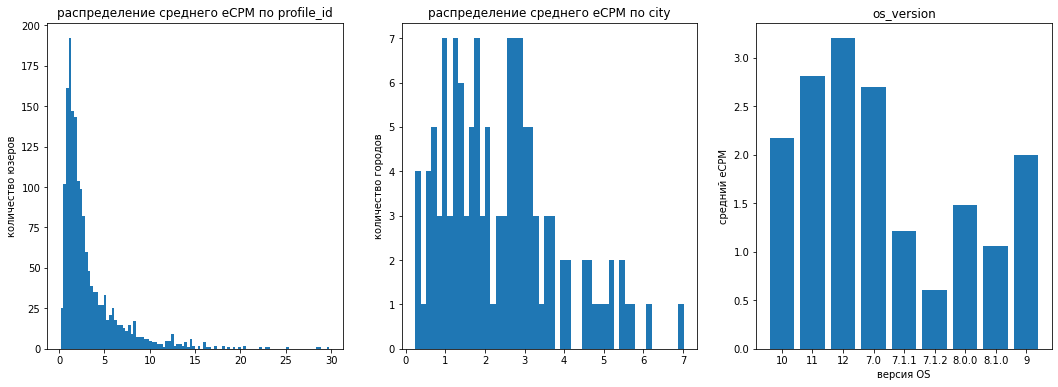

In [39]:
#Считаем данные по eCPM

iterable_list = ['profile_id','city','os_version']

fig, axes = plt.subplots(1, 3, figsize=(18,6)) 

for j, i in enumerate(iterable_list):
  agg_func_math = {'revenue': ['sum','count', 'mean' ]}

  df_with_rev = df_with_revenue.groupby([i]).agg(agg_func_math).reset_index() 
  df_with_rev.columns = [tup[1] if tup[1] else tup[0] for tup in df_with_rev.columns]  #ставим заголовки на один уровень
  a = 3
  df_with_rev['arrange_reveue'] = (df_with_rev['sum'] + a*df_with_rev['mean'].mean())/ (df_with_rev['count'] + a)
  
  
  if i == 'profile_id':
    p = df_with_rev[df_with_rev['count'] > 100]                                 #убираем юзеров с количеством просмотров >100
    p['eCPM_mean'] = p['arrange_reveue'] *1000                            #  средний   eCPM на юзера    
    
  
    #Построние графиков
    axes[j].hist(p['eCPM_mean'], bins=100)
    axes[j].set_ylabel('количество юзеров')
    axes[j].set_title(f"распределение среднего eCPM по {i}")

  else:
    p = df_with_rev[df_with_rev['count'] > 1000]                #убираем города  с количеством просмотров >500 (осей с такими параметрами нет)                
    p['eCPM_mean'] = p['arrange_reveue'] *1000         #  средний   eCPM на ось/город
    
    if i == 'os_version':

      axes[j].bar(p['os_version'],p['eCPM_mean'])
      axes[j].set_ylabel('средний eCPM')
      axes[j].set_xlabel('версия OS')
      axes[j].set_title(i)

    elif i == 'city':
      axes[j].hist(p['eCPM_mean'], bins=50)
      axes[j].set_ylabel('количество городов')
      axes[j].set_title(f"распределение среднего eCPM по {i}")
  


  print()
  print( )
  print(f"         Топ10 {i} по eCPM_mean")
  display(p.sort_values(by = 'eCPM_mean', ascending=False).head(10))




         Топ city по суммарным доходам



,city,revenue
585,New York,47.45
388,Indianapolis,36.68
377,Houston,34.55
540,Minneapolis,34.24
161,Cleveland,32.48
140,Charlotte,25.62
172,Columbus,22.16
483,Los Angeles,19.74
792,Spokane,18.92
197,Dallas,18.75




         Топ os_version по суммарным доходам



,os_version,revenue
2,12,1305.58
1,11,587.16
0,10,328.27
10,9,133.11
8,8.0.0,11.89
5,7.0,10.95
9,8.1.0,9.79
6,7.1.1,1.62
7,7.1.2,1.09
4,6.0.1,0.78


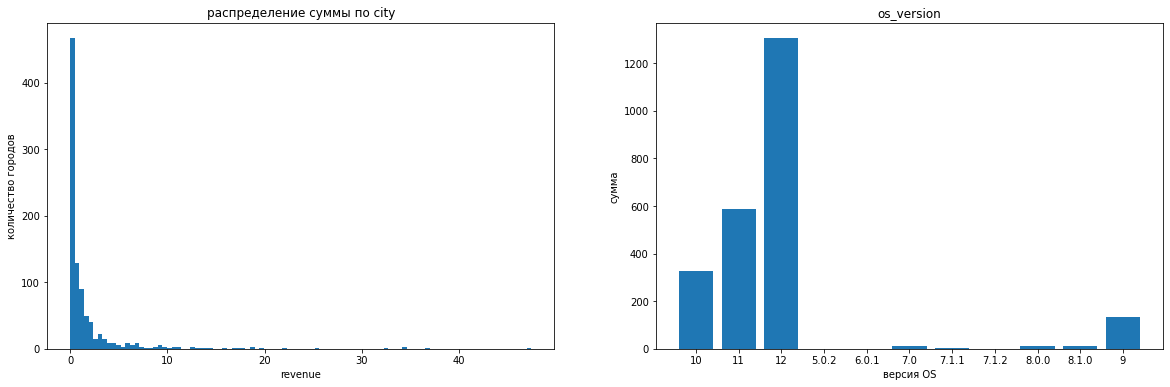

In [38]:
#сумарные доходы по городам и OS
fig, axes = plt.subplots(1, 2, figsize=(20,6))
spisok = ['city', 'os_version']

for j, i in enumerate(spisok):
  sum_i = df_with_revenue.groupby(df_with_revenue[i])[['revenue']].sum().round(2).reset_index()

  if i ==('city'):

    axes[j].hist(sum_i['revenue'], bins=100)
    axes[j].set_ylabel('количество городов')
    axes[j].set_xlabel('revenue')
    axes[j].set_title(f"распределение суммы по {i}")

  else:

    axes[j].bar(sum_i['os_version'],sum_i['revenue'],)
    axes[j].set_ylabel('сумма')
    axes[j].set_xlabel('версия OS')
    axes[j].set_title(i)



  print()
  print( )
  print(f"         Топ {i} по суммарным доходам")
  print()
  display(sum_i.sort_values(by = 'revenue', ascending=False).head(20))
  